## World Bank Data: Women Business and the Law Index Score

### About

Within this Juypter Notebook the World Bank Data about the Women Business and the Law Indes Score is being cleaned. The data is derived from the World Bank Data Website.


In [362]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [363]:
# import csv data
womenBusinessLaw = pd.read_excel('../Data/TheWorldBank_WomenBusinessLawIndexScore.xlsx')
womenBusinessLaw.dtypes

TheWorldBank_WomenBusinessLawIndexScore     object
Unnamed: 1                                  object
Unnamed: 2                                  object
Unnamed: 3                                  object
Unnamed: 4                                 float64
Unnamed: 5                                 float64
Unnamed: 6                                 float64
Unnamed: 7                                 float64
Unnamed: 8                                 float64
Unnamed: 9                                 float64
Unnamed: 10                                float64
Unnamed: 11                                float64
Unnamed: 12                                float64
Unnamed: 13                                float64
Unnamed: 14                                float64
Unnamed: 15                                float64
Unnamed: 16                                float64
Unnamed: 17                                float64
Unnamed: 18                                float64
Unnamed: 19                    

In [364]:
# remove first row and create new header
new_header = womenBusinessLaw.iloc[0] 
womenBusinessLaw = womenBusinessLaw[1:] 
womenBusinessLaw.columns = new_header
womenBusinessLaw.dtypes

0
Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1970.0            float64
1971.0            float64
1972.0            float64
1973.0            float64
1974.0            float64
1975.0            float64
1976.0            float64
1977.0            float64
1978.0            float64
1979.0            float64
1980.0            float64
1981.0            float64
1982.0            float64
1983.0            float64
1984.0            float64
1985.0            float64
1986.0            float64
1987.0            float64
1988.0            float64
1989.0            float64
1990.0            float64
1991.0            float64
1992.0            float64
1993.0            float64
1994.0            float64
1995.0            float64
1996.0            float64
1997.0            float64
1998.0            float64
1999.0            float64
2000.0            float64
2001.0            float64
2002.0            float64
2003.0            float64
2004.0    

In [365]:
# clean the column names
for i in range(1970, 2020, 1):
    newName = int(i)
    oldName = str(i) + ".0"
     
    womenBusinessLaw.rename({float(oldName): newName},axis=1, inplace=True)

womenBusinessLaw.dtypes

0
Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1970              float64
1971              float64
1972              float64
1973              float64
1974              float64
1975              float64
1976              float64
1977              float64
1978              float64
1979              float64
1980              float64
1981              float64
1982              float64
1983              float64
1984              float64
1985              float64
1986              float64
1987              float64
1988              float64
1989              float64
1990              float64
1991              float64
1992              float64
1993              float64
1994              float64
1995              float64
1996              float64
1997              float64
1998              float64
1999              float64
2000              float64
2001              float64
2002              float64
2003              float64
2004      

In [366]:
# drop Country Code, Indicator Code
womenBusinessLaw = womenBusinessLaw.drop(columns=['Country Code', 'Indicator Code'])

In [367]:
# define function for returning the WomenBussinesIndexScore per country and year
def getWomenBussinesIndexScorePerCountryAndYear(country, year):
    countrySubset = womenBusinessLaw[womenBusinessLaw["Country Name"] == country]
    
    if countrySubset.empty:
        return np.NaN
    else:
        return countrySubset.iloc[0][int(year)]
    
# test the new function
print(getWomenBussinesIndexScorePerCountryAndYear("Kosovo", 1971))

67.5


In [368]:
# import excel data of entrepreneurial activity
worldbankdata = pd.read_excel("../Data/TheWorldBank_Entrepreneurship.xlsx")
worldbankdata.dtypes

Unnamed: 0                object
Unnamed: 1                object
Unnamed: 2                object
Owners of new LLCs        object
Unnamed: 4                object
Unnamed: 5                object
Sole proprietors          object
Unnamed: 7                object
Unnamed: 8                object
Directors of new LCCS     object
Unnamed: 10               object
Unnamed: 11               object
Unnamed: 12              float64
Unnamed: 13               object
Owners of new LLCs.1      object
Unnamed: 15               object
Sole proprietors.1        object
Unnamed: 17               object
Directors of new LCCs     object
Unnamed: 19               object
dtype: object

In [369]:
# remove unnamed columns without any value
worldbankdata = worldbankdata.drop(columns=['Unnamed: 13', 'Unnamed: 12']) 

# remove first row and create new header
new_header = worldbankdata.iloc[0] 
worldbankdata = worldbankdata[1:] 
worldbankdata.columns = new_header
worldbankdata.dtypes

0
Country                              object
Income group                         object
Year                                 object
Number of female business owners     object
Number of male business owners       object
Total number of business owners      object
Number of female sole proprietors    object
Number of male sole proprietors      object
Total number of sole proprietors     object
Number of female directors           object
Number of male directors             object
Total number of directors            object
Share of female business owners      object
Share of male business owners        object
Share of female sole proprietors     object
Share of male sole proprietors       object
Share of female directors            object
Share of male directors              object
dtype: object

In [370]:
# convert data types
def transformColumnToInt(dataframe, columnName):
    dataframe[columnName] = dataframe[columnName].astype("Int64") 
    
def transformColumnToFloat(dataframe, columnName):
    dataframe[columnName] = dataframe[columnName].astype(float) 
    
transformColumnToInt(worldbankdata,"Number of female business owners")
transformColumnToInt(worldbankdata,"Number of male business owners")
transformColumnToInt(worldbankdata,"Total number of business owners")

transformColumnToFloat(worldbankdata,"Number of female sole proprietors")
transformColumnToFloat(worldbankdata,"Number of male sole proprietors")

transformColumnToFloat(worldbankdata,"Number of female sole proprietors")
transformColumnToFloat(worldbankdata,"Total number of sole proprietors")

transformColumnToInt(worldbankdata,"Number of female directors")
transformColumnToInt(worldbankdata,"Number of male directors")
transformColumnToInt(worldbankdata,"Total number of directors")

transformColumnToFloat(worldbankdata,"Share of female business owners")
transformColumnToFloat(worldbankdata,"Share of male business owners")
transformColumnToFloat(worldbankdata,"Share of female sole proprietors")

transformColumnToFloat(worldbankdata,"Share of male sole proprietors")
transformColumnToFloat(worldbankdata,"Share of female directors")
transformColumnToFloat(worldbankdata,"Share of male directors")

# remove empty rows from excel
worldbankdata = worldbankdata.dropna(subset=['Year'])    
worldbankdata.head(6)

,Country,Income group,Year,Number of female business owners,Number of male business owners,Total number of business owners,Number of female sole proprietors,Number of male sole proprietors,Total number of sole proprietors,Number of female directors,Number of male directors,Total number of directors,Share of female business owners,Share of male business owners,Share of female sole proprietors,Share of male sole proprietors,Share of female directors,Share of male directors
2,Afghanistan,Low income,2014,65,5043,5108,14.0,2117.0,2131.0,34,3414,3448,0.012725,0.987275,0.006570,0.993430,0.009861,0.990139
3,Afghanistan,Low income,2015,45,4704,4749,26.0,3110.0,3136.0,11,2398,2409,0.009476,0.990524,0.008291,0.991709,0.004566,0.995434
4,Afghanistan,Low income,2016,65,5036,5101,33.0,4403.0,4436.0,32,2473,2505,0.012743,0.987257,0.007439,0.992561,0.012774,0.987226
5,Afghanistan,Low income,2017,88,6047,6135,74.0,4343.0,4417.0,34,2677,2711,0.014344,0.985656,0.016753,0.983247,0.012541,0.987459
6,Afghanistan,Low income,2018,177,8482,8659,149.0,5103.0,5252.0,93,5057,5150,0.020441,0.979559,0.028370,0.971630,0.018058,0.981942
8,Albania,Upper middle income,2014,401,1818,2219,4984.0,8812.0,13796.0,344,1779,2123,0.180712,0.819288,0.361264,0.638736,0.162035,0.837965


In [375]:
# transfer the WomenBussinesIndexScore to the data frame of the worldbank data
for index, row in worldbankdata.iterrows():
    
    year = row["Year"]
    country = row["Country"]
    value = getWomenBussinesIndexScorePerCountryAndYear(country, year)
    
    worldbankdata.at[index,'WomenBussinesIndex'] = value
    
worldbankdata.head(6)

,Country,Income group,Year,Number of female business owners,Number of male business owners,Total number of business owners,Number of female sole proprietors,Number of male sole proprietors,Total number of sole proprietors,Number of female directors,Number of male directors,Total number of directors,Share of female business owners,Share of male business owners,Share of female sole proprietors,Share of male sole proprietors,Share of female directors,Share of male directors,WomenBussinesIndex
2,Afghanistan,Low income,2014,65,5043,5108,14.0,2117.0,2131.0,34,3414,3448,0.012725,0.987275,0.006570,0.993430,0.009861,0.990139,28.8
3,Afghanistan,Low income,2015,45,4704,4749,26.0,3110.0,3136.0,11,2398,2409,0.009476,0.990524,0.008291,0.991709,0.004566,0.995434,28.8
4,Afghanistan,Low income,2016,65,5036,5101,33.0,4403.0,4436.0,32,2473,2505,0.012743,0.987257,0.007439,0.992561,0.012774,0.987226,38.1
5,Afghanistan,Low income,2017,88,6047,6135,74.0,4343.0,4417.0,34,2677,2711,0.014344,0.985656,0.016753,0.983247,0.012541,0.987459,38.1
6,Afghanistan,Low income,2018,177,8482,8659,149.0,5103.0,5252.0,93,5057,5150,0.020441,0.979559,0.028370,0.971630,0.018058,0.981942,38.1
8,Albania,Upper middle income,2014,401,1818,2219,4984.0,8812.0,13796.0,344,1779,2123,0.180712,0.819288,0.361264,0.638736,0.162035,0.837965,85.6


In [372]:
# create the toplist of the coutires with the highest share of female business owners in 2018
chart1 = worldbankdata.query('Year == 2018').sort_values(by=['Share of female business owners'], ascending=False)
chart1 = chart1[['Country', 'Share of female business owners']]
chart1.reset_index(drop=True, inplace=True)
chart1.head(20)

,Country,Share of female business owners
0,Romania,0.391966
1,Mongolia,0.368350
2,"Taiwan, China",0.352221
3,Latvia,0.340686
4,Samoa,0.337302
5,Chile,0.337130
6,Lesotho,0.335859
7,Nigeria,0.335392
8,Bhutan,0.333333
9,Jamaica,0.314747


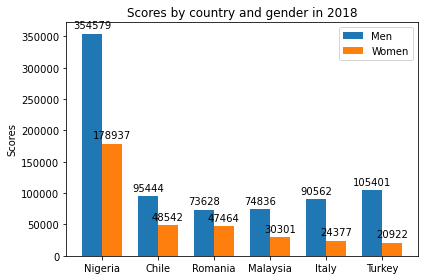

In [378]:
# filter the data
chart2 = worldbankdata.query('Year == 2018').sort_values(by=['Number of female business owners'], ascending=False)
chart2 = chart2[['Country', 'Number of female business owners', 'Number of male business owners']]
chart2.reset_index(drop=True, inplace=True)
chart2 = chart2.truncate(after=5)

# draw the chart
labels = chart2["Country"].tolist()
men_means = chart2["Number of male business owners"].tolist()
women_means = chart2["Number of female business owners"].tolist()

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by country and gender in 2018')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

[5401.0888888888885, 8139.04, 8545.056603773584, 9463.96, 9628.365384615385]
[2014, 2015, 2016, 2017, 2018]


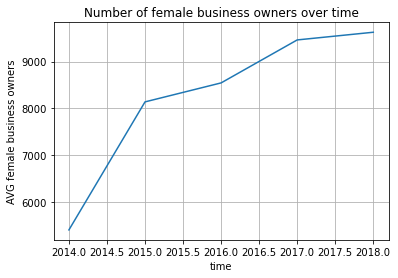

In [379]:
# filter the data
avgFemaleBusinessOwners = []
years = []

for year in range(2014, 2019, 1):
    
    result = worldbankdata[(worldbankdata.Year == year)]["Number of female business owners"].mean()
    
    avgFemaleBusinessOwners.append(result)
    years.append(year)
    
print(avgFemaleBusinessOwners)
print(years)

    
fig, ax = plt.subplots()
ax.plot(years, avgFemaleBusinessOwners)

ax.set(xlabel='time', ylabel='AVG female business owners',
       title='Number of female business owners over time')
ax.grid()

fig.savefig("test.png")
plt.show()